# Riemann Sum Calculation and Visualization

This Jupyter Notebook demonstrates the calculation and visualization of Riemann sums for the function \( f(x) = x^2 \) over the interval \([0, 1]\). We will compute the left, right, and midpoint Riemann sums using 10 subintervals and visualize the results using matplotlib.

The notebook includes the following steps:
1. Define the function to be integrated.
2. Set the interval \([a, b]\) and the number of subintervals \(n\).
3. Calculate the width of each subinterval \(dx\).
4. Compute the left, right, and midpoint Riemann sums.
5. Plot the function and the Riemann sums for visualization.

## Importing the libraries

In [40]:
# Import necessary libraries
from IPython.display import display, Math, Markdown
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import latex

# Define the variable x
x = sp.symbols('x')


## Riemann Sum 
The Riemann sum is a method for approximating the definite integral of a function over an interval. It works by dividing the interval into smaller subintervals, calculating the function's value at specific points within each subinterval, and then summing the products of these values and the subinterval widths. There are three common types of Riemann sums:

1. **Left Riemann Sum**: Uses the left endpoint of each subinterval.
2. **Right Riemann Sum**: Uses the right endpoint of each subinterval.
3. **Midpoint Riemann Sum**: Uses the midpoint of each subinterval.

In this notebook, we will calculate and visualize these Riemann sums for the function $ f(x) = sin(x) $ over the interval $[0, \pi]$ using 10 subintervals.


In [55]:
def riemann_sum_terms(f, n, a, b, sum_type):
    dx = (b - a) / n

    if sum_type == 'left':
        x_vals = np.linspace(a, b - dx, n)
    elif sum_type == 'right':
        x_vals = np.linspace(a + dx, b, n)
    elif sum_type == 'midpoint':
        x_vals = np.linspace(a + dx/2, b - dx/2, n)
    else:
        raise ValueError("sum_type must be 'left', 'right', or 'midpoint'")

    terms = [f.subs(x, val) * dx for val in x_vals]
    display(Markdown(f"Riemann Sum for $f:x \\mapsto  {latex(f)}$"))
    display(Markdown(f"{sum_type.capitalize()} Riemann Sum Terms:"))
    for i, term in enumerate(terms):
        display(Markdown(f"$x_{i}$={x_vals[i]}:  $f(x_{i}) \\times dx = {sp.N(term)}$"))
    display(Markdown(f"Total {sum_type.capitalize()} Riemann Sum:" + f" ${sp.N(sum(terms))}$"))

# Define the function f(x) = sin(x)
f = sp.sin(x)
n = 4
a = 0
b = np.pi
riemann_sum_terms(f, n, a, b, 'left')

Riemann Sum for $f:x \mapsto  \sin{\left(x \right)}$

Left Riemann Sum Terms:

$x_0$=0.0:  $f(x_0) \times dx = 0$

$x_1$=0.7853981633974483:  $f(x_1) \times dx = 0.555360367269796$

$x_2$=1.5707963267948966:  $f(x_2) \times dx = 0.785398163397448$

$x_3$=2.356194490192345:  $f(x_3) \times dx = 0.555360367269796$

Total Left Riemann Sum: $1.89611889793704$

## Riemann Sum Visualization
The following plots visualize the function $ f: x \mapsto x^2 $ and the corresponding Riemann sums over the interval $ [0, 1] $ using 10 subintervals:



Left Riemann Sum: 0.2850000000000001
Right Riemann Sum: 0.385
Midpoint Riemann Sum: 0.33249999999999996


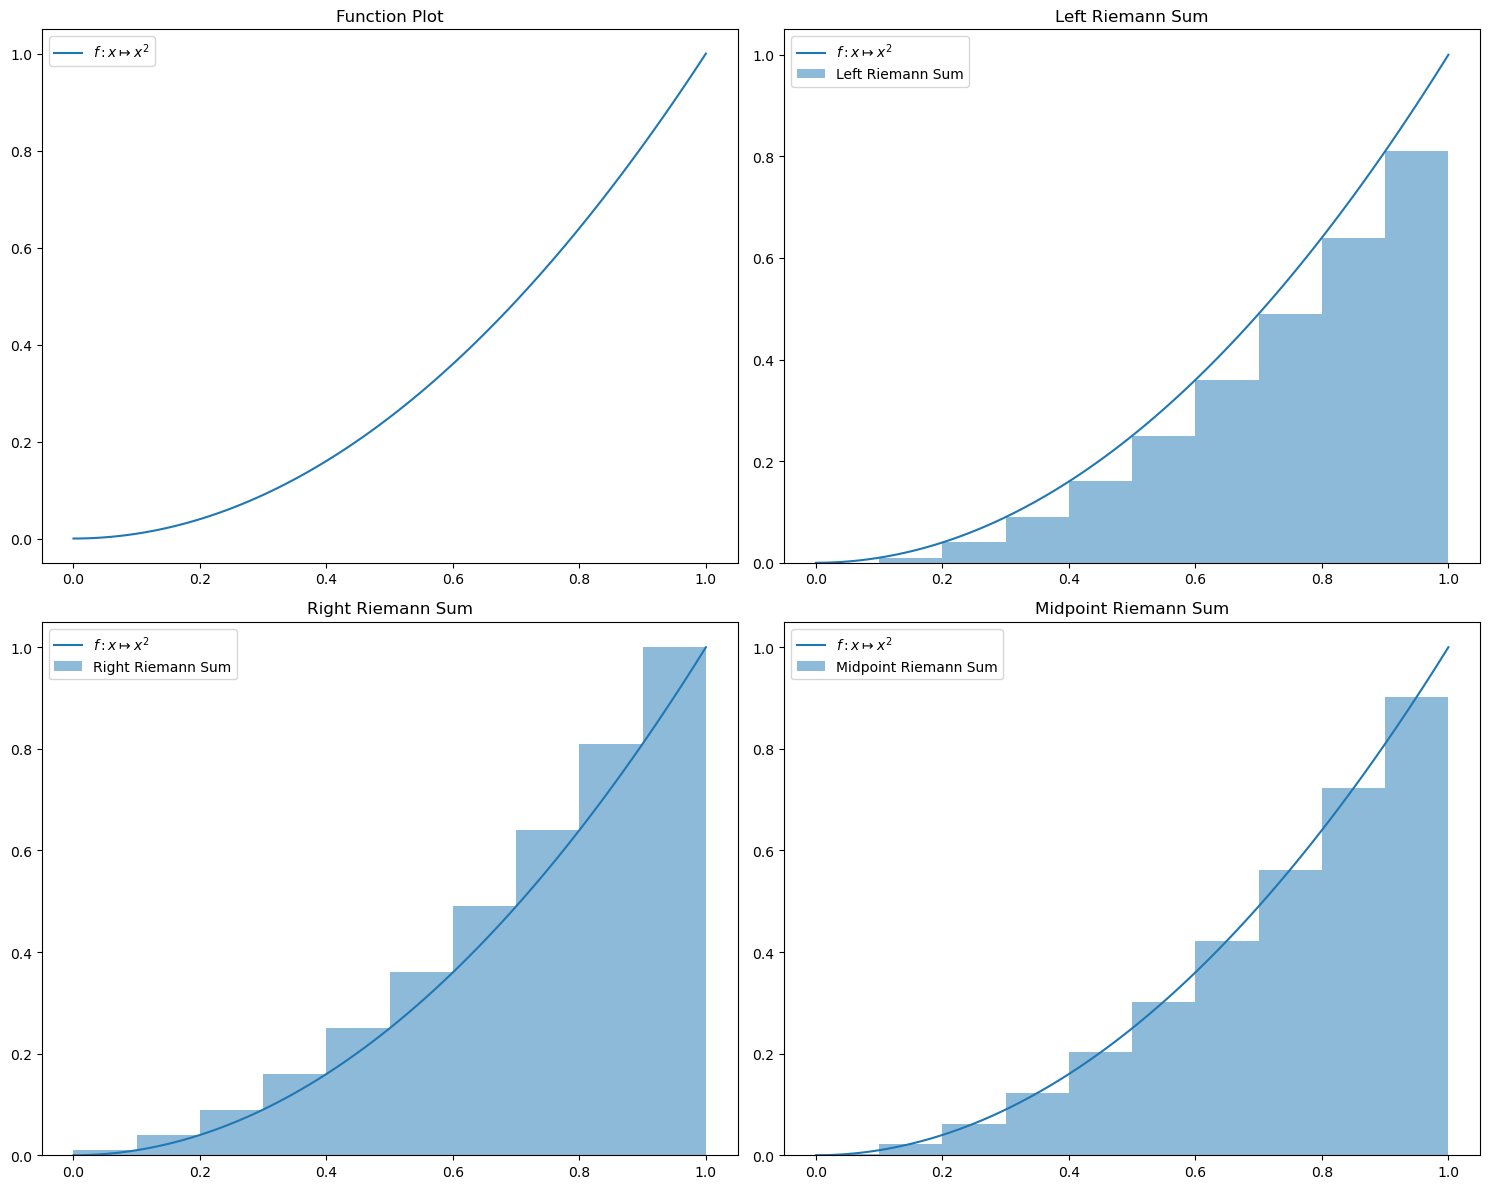

In [57]:



# Define the function to be integrated using sympy
f = x**2
f_lambdified = sp.lambdify(x, f, 'numpy')

# Define the interval [a, b]
a = 0
b = 1
x_vals = np.linspace(a, b, 100)
y_vals = f_lambdified(x_vals)

# Define the number of subintervals
n = 10

# Calculate the width of each subinterval
dx = (b - a) / n

x_left = np.linspace(a, b - dx, n)
left_riemann_sum = np.sum(f_lambdified(x_left) * dx)

x_right = np.linspace(a + dx, b, n)
right_riemann_sum = np.sum(f_lambdified(x_right) * dx)

x_mid = np.linspace(a + dx/2, b - dx/2, n)
mid_riemann_sum = np.sum(f_lambdified(x_mid) * dx)

# Print the results
print(f"Left Riemann Sum: {left_riemann_sum}")
print(f"Right Riemann Sum: {right_riemann_sum}")
print(f"Midpoint Riemann Sum: {mid_riemann_sum}")

# Plot the function and the Riemann sums
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the function
axs[0, 0].plot(x_vals, y_vals, label=f'$f:x\\mapsto {latex(f)}$')
axs[0, 0].set_title('Function Plot')
axs[0, 0].legend()

# Plot the Left Riemann Sum
axs[0, 1].plot(x_vals, y_vals, label=f'$f:x\\mapsto {latex(f)}$')
axs[0, 1].bar(x_left, f_lambdified(x_left), width=dx, align='edge', alpha=0.5, label='Left Riemann Sum')
axs[0, 1].set_title('Left Riemann Sum')
axs[0, 1].legend()

# Plot the Right Riemann Sum
axs[1, 0].plot(x_vals, y_vals, label=f'$f:x\\mapsto {latex(f)}$')
axs[1, 0].bar(x_right, f_lambdified(x_right), width=-dx, align='edge', alpha=0.5, label='Right Riemann Sum')
axs[1, 0].set_title('Right Riemann Sum')
axs[1, 0].legend()

# Plot the Midpoint Riemann Sum
axs[1, 1].plot(x_vals, y_vals, label=f'$f:x\\mapsto {latex(f)}$')
axs[1, 1].bar(x_mid, f_lambdified(x_mid), width=dx, align='center', alpha=0.5, label='Midpoint Riemann Sum')
axs[1, 1].set_title('Midpoint Riemann Sum')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


## Effect of the Number of Partitions $n$

The value of $n$ represents the number of subintervals (partitions) used to approximate the area under the curve using Riemann sums. As $n$ increases, the width of each subinterval $dx$ decreases, leading to a more accurate approximation of the integral. In the code below, we calculate and visualize the left, right, and midpoint Riemann sums for different values of $n$ to observe how the approximation improves with increasing $n$.

The code below defines the function to be integrated, sets the interval $[a, b]$, and calculates the Riemann sums for different values of $n$. It then plots the function and the Riemann sums for visualization. The `interact` function from `ipywidgets` is used to create an interactive plot that allows you to change the value of $n$ and the type of Riemann sum (left, right, or midpoint) to see the effect on the approximation.

In [58]:
from ipywidgets import interact



# Define the function to be integrated using sympy
f = -(2-x)**2 + 4

# Define the interval [a, b]
a = 0
b = 4
f_lambdified = sp.lambdify(x, f, 'numpy')
x_vals = np.linspace(a, b, 100)
y_vals = f_lambdified(x_vals)

def plot_riemann_sums(n, sum_type):
    dx = (b - a) / n

    x_left = np.linspace(a, b - dx, n)
    left_riemann_sum = np.sum(f_lambdified(x_left) * dx)

    x_right = np.linspace(a + dx, b, n)
    right_riemann_sum = np.sum(f_lambdified(x_right) * dx)

    x_mid = np.linspace(a + dx/2, b - dx/2, n)
    mid_riemann_sum = np.sum(f_lambdified(x_mid) * dx)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the function
    ax.plot(x_vals, y_vals, label=f'$f:x\\mapsto {latex(f)}$')
    if sum_type == 'left':
        ax.set_title(f'Left Riemann Sum: {left_riemann_sum}')
    elif sum_type == 'right':
        ax.set_title(f'Right Riemann Sum: {right_riemann_sum}')
    elif sum_type == 'midpoint':
        ax.set_title(f'Midpoint Riemann Sum: {mid_riemann_sum}')
    ax.legend()

    if sum_type == 'left':
        ax.bar(x_left, f_lambdified(x_left), width=dx, align='edge', alpha=0.5, label='Left Riemann Sum')
    elif sum_type == 'right':
        ax.bar(x_right, f_lambdified(x_right), width=-dx, align='edge', alpha=0.5, label='Right Riemann Sum')
    elif sum_type == 'midpoint':
        ax.bar(x_mid, f_lambdified(x_mid), width=dx, align='center', alpha=0.5, label='Midpoint Riemann Sum')

    ax.legend()
    plt.tight_layout()
    plt.show()

interact(plot_riemann_sums, n=(1, 100), sum_type=['left', 'right', 'midpoint'])


interactive(children=(IntSlider(value=50, description='n', min=1), Dropdown(description='sum_type', options=('…

<function __main__.plot_riemann_sums(n, sum_type)>